In [1]:
from SAXSsimulations import  Sphere, Cylinder
from SAXSsimulations.plotting import *


In [2]:
simulation = Sphere(size = 10, nPoints = 501, volFrac = 0.05)
simulation.place_shape()

volume fraction is 0.04706, radius is 2.33, center at (-0.4,1.4,-1.3) 
volume fraction is 0.09520, radius is 2.33, center at (1.1,-1.4,0.8) 


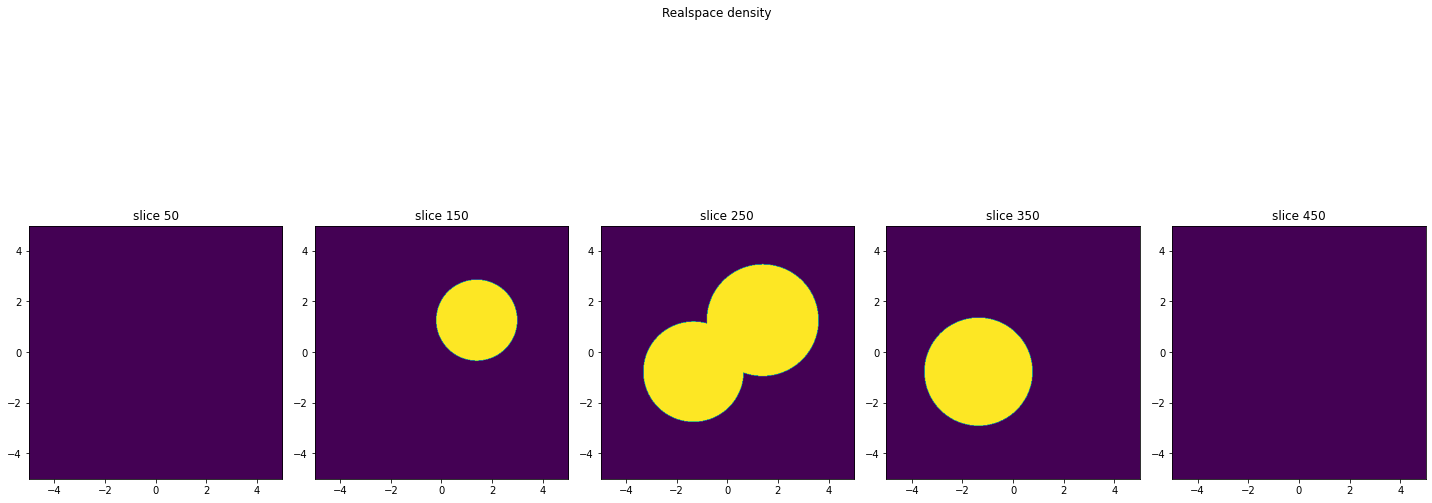

In [3]:
plot_slices(simulation.density, simulation.grid)

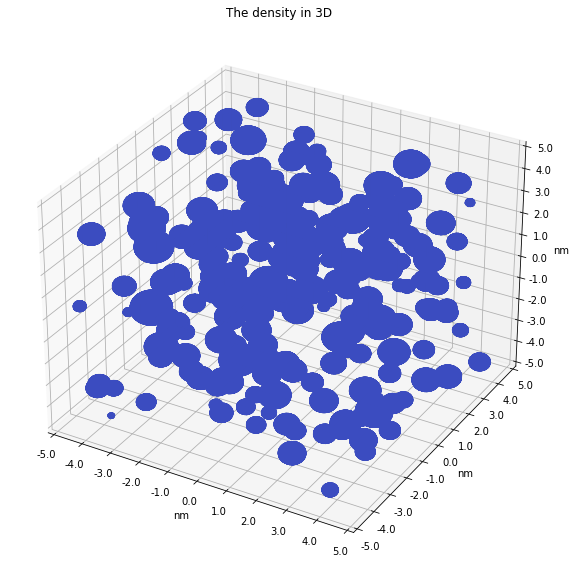

In [12]:
plot_3D_structure(simulation.density, simulation.grid, realspace=True)

In [4]:
simulation.calculate_custom_FTI_3D(device = 'cpu')
simulation.calculate_torch_FTI_3D(device = 'cpu')
simulation.sinc()

/home/slaskina/SAXS-simulations/SAXSsimulations/create_form.py:82: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352657443/work/aten/src/ATen/native/Copy.cpp:250.)
  if density[k,:,:].any():


the maximal difference between the implementation of the FTI is 0.0


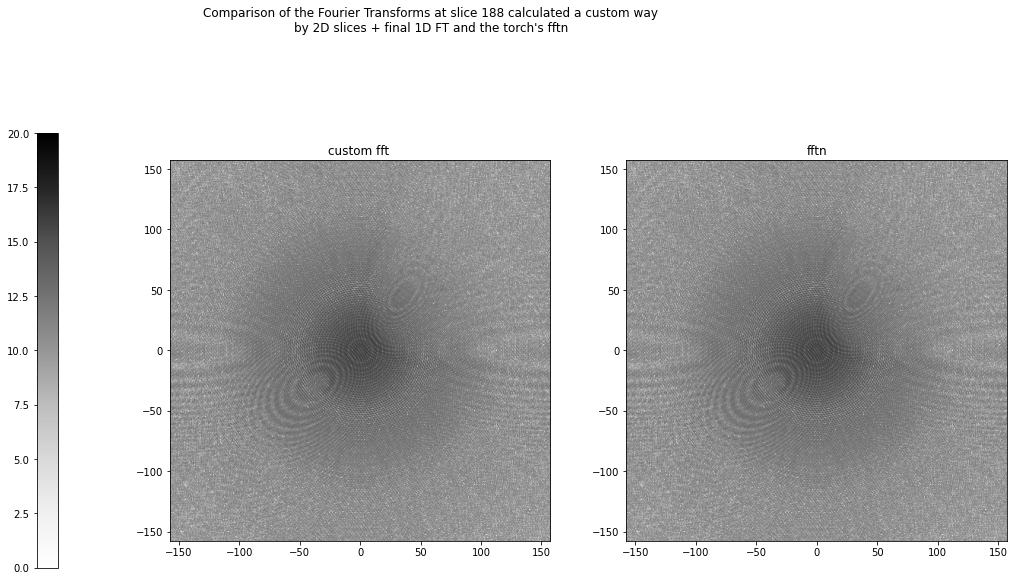

In [5]:
plot_FTI_version(simulation.FTI_custom, simulation.FTI_torch, simulation.qx)

In [7]:
import torch
#plot_3D_structure(torch.from_numpy(simulation.FTI), simulation.qx, realspace= False)

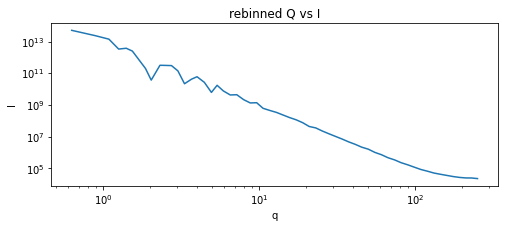

In [6]:
simulation.reBin(200)
simulation.drop_first_bin()
plot_Q_vs_I(simulation.binned_data)

In [8]:
simulation.save_data(directory='dat_files')
print("the sphere file with radius {r:.3f}  is saved".format(r = simulation.rMean))

the sphere file with radius 2.331  is saved


In [2]:
simulation = Sphere(size = 10, nPoints = 501, volFrac = 0.05)
simulation.place_shape(single=True)

volume fraction is 0.00024, radius is 0.39, center at (3.9,-3.1,-1.9) 


In [5]:
simulation = Cylinder(size = 10, nPoints = 501, volFrac = 0.05)
simulation.place_shape(single = True)

volume fraction is 0.00001, height is 2.44, radius is 2.04, center at (0.9,-1.6,-0.4) 


In [44]:
from SAXSsimulations import  Sphere, Cylinder
from SAXSsimulations.plotting import *

simulation = Cylinder(size = 10, nPoints = 501, volFrac = 0.05)
simulation.place_shape()

volume fraction is 0.00011, height is 4.957, radius is 0.503, center at (3.3,1.9,-1.8) 
volume fraction is 0.00020, height is 4.730, radius is 0.463, center at (-1.1,1.0,1.0) 
volume fraction is 0.00025, height is 4.556, radius is 0.358, center at (4.2,-2.9,0.3) 
volume fraction is 0.00040, height is 4.609, radius is 0.598, center at (-3.9,-0.5,1.1) 
volume fraction is 0.00049, height is 4.649, radius is 0.490, center at (-4.0,0.4,-2.6) 
volume fraction is 0.00062, height is 4.650, radius is 0.567, center at (0.8,-1.5,2.0) 
volume fraction is 0.00072, height is 4.544, radius is 0.497, center at (3.4,3.0,-4.6) 
volume fraction is 0.00080, height is 4.364, radius is 0.454, center at (1.9,-1.2,3.0) 
volume fraction is 0.00086, height is 5.005, radius is 0.364, center at (1.1,-1.9,2.3) 
--->outside on yz-plane
--->outside on yz-plane
volume fraction is 0.00096, height is 4.339, radius is 0.515, center at (-3.6,-0.6,-3.3) 
--->outside on yz-plane
--->outside on yz-plane
--->outside of x pla

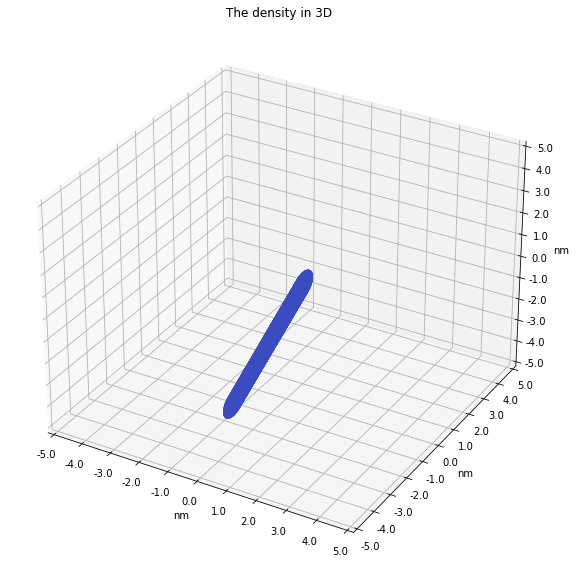

In [39]:
plot_3D_structure(simulation.density, simulation.grid, realspace=True)

70.45075515164942 17.392823661622675


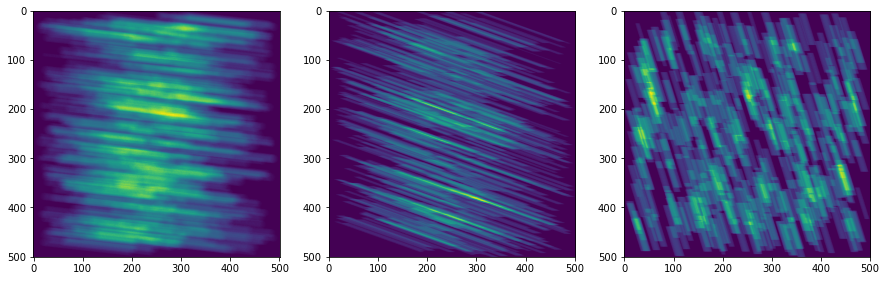

In [45]:
print(simulation.theta, simulation.phi)
fig,axs = plt.subplots(1,3,figsize = (15,5))
ax = axs[0]
im = ax.imshow(simulation.density.sum(axis=0))
ax = axs[1]
im = ax.imshow(simulation.density.sum(axis=1))
ax = axs[2]
im = ax.imshow(simulation.density.sum(axis=2))
plt.show()     

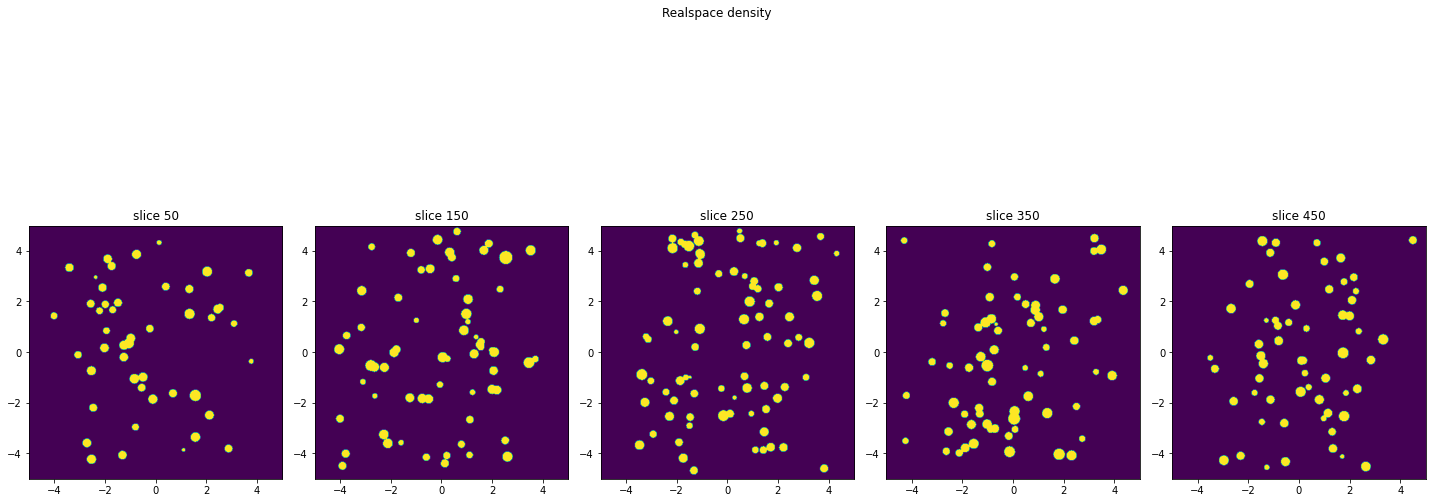

In [48]:
plot_slices(simulation.density, simulation.grid, direction ='x')

the maximal difference between the implementation of the FTI is 0.0


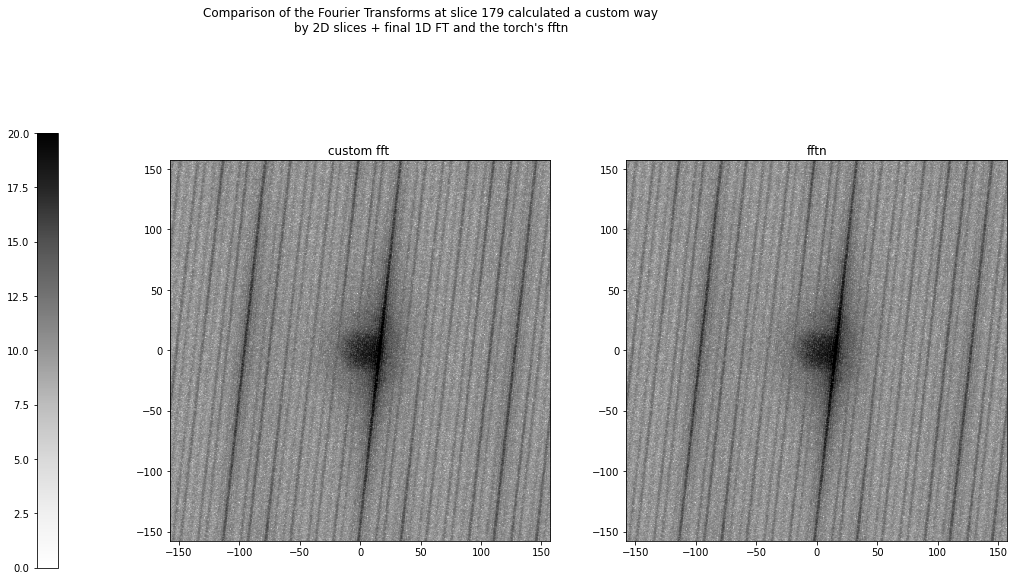

In [49]:
simulation.calculate_custom_FTI_3D(device = 'cpu')
simulation.calculate_torch_FTI_3D(device = 'cpu')
plot_FTI_version(simulation.FTI_custom, simulation.FTI_torch, simulation.qx)
simulation.sinc()

In [110]:
pwd

'/home/slaskina/SAXS-simulations'

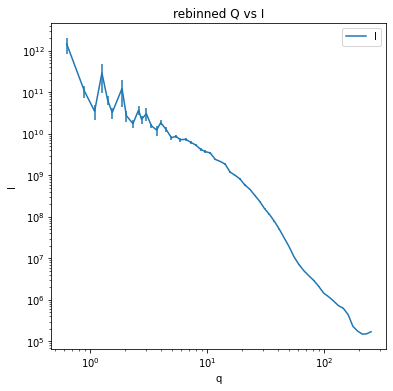

In [50]:
simulation.reBin(200)
simulation.drop_first_bin()
plot_Q_vs_I(simulation.binned_data)

In [52]:
simulation.save_data(directory='dat_files')
print("the cylinder file with radius {r:.3f} and height {h:.3f} is saved".format(r = simulation.rMean, h = simulation.hMean))

the cylinder file with radius 0.511 and height 4.650 is saved


In [69]:
model = sasmodels.core.load_model('cylinder')

sasmodels.modelinfo.ModelInfo

In [79]:
q = np.geomspace(float(simulation.binned_data['Q'].min()), float(simulation.binned_data['Q'].max()), 501)
Q_sas = np.array(q[np.newaxis, :])
q1 = simulation.binned_data['Q'].values
Q_sas1 = np.array(q1[np.newaxis, :])

In [42]:

modelParameters = model.info.parameters.defaults.copy()
print(modelParameters)

{'scale': 1, 'background': 0.001, 'sld': 4, 'sld_solvent': 1, 'radius': 20, 'length': 400, 'theta': 60, 'phi': 60, 'up_frac_i': 0.0, 'up_frac_f': 0.0, 'up_angle': 0.0, 'up_phi': 0.0, 'sld_M0': 0.0, 'sld_mtheta': 0.0, 'sld_mphi': 0.0, 'sld_solvent_M0': 0.0, 'sld_solvent_mtheta': 0.0, 'sld_solvent_mphi': 0.0}


In [99]:

modelParameters.update({
    'radius': simulation.rMean, 
    'background':0, 
    'scale':3.5979e+15,
    'sld':1.01,
    'sld_solvent':0.01,
    'radius_pd': simulation.rWidth, 
    'radius_pd_type': 'gaussian', 
    'radius_pd_n': 35, 
    'length': simulation.hMean, 
    'length_pd': simulation.hWidth, 
    'length_pd_type': 'gaussian', 
    'length_pd_n': 35, 
    'theta': simulation.theta,
    'phi': simulation.phi
    })
kernel=model.make_kernel(Q_sas)
intensity = sasmodels.direct_model.call_kernel(kernel, modelParameters)

In [100]:

kernel1=model.make_kernel(Q_sas1)
intensity1 = sasmodels.direct_model.call_kernel(kernel1, modelParameters)

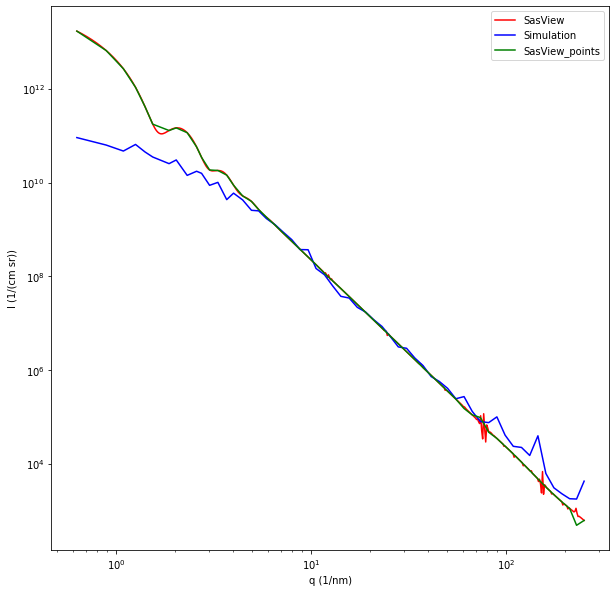

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(q, intensity, '-', color = 'red', label = 'SasView')
plt.plot(simulation.binned_data.Q, simulation.binned_data.I, color = 'blue', label = 'Simulation')
plt.plot(q1, intensity1, '-', color = 'green', label = 'SasView_points')
plt.xlabel("q (1/nm)")
plt.ylabel("I (1/(cm sr))")
plt.xscale('log') 
plt.yscale('log') 
plt.legend()
